
## steps in pipeline
1.   design model (input,output size,forward pass)
2.   construct loss and optimizer
3.   training loop

  - forward pass : compute prediction
  - backward pass : gradients
  - update weights 



In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,
                                            random_state = 1)

In [3]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

In [6]:
#y
n_samples, n_features =X.shape


In [8]:
# 1) model

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [9]:
# 2) loss and optimizer

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

epoch:10,loss=4458.4551
epoch:20,loss=3325.1946
epoch:30,loss=2505.1252
epoch:40,loss=1911.0658
epoch:50,loss=1480.3042
epoch:60,loss=1167.6704
epoch:70,loss=940.5804
epoch:80,loss=775.5002
epoch:90,loss=655.4120
epoch:100,loss=567.9969


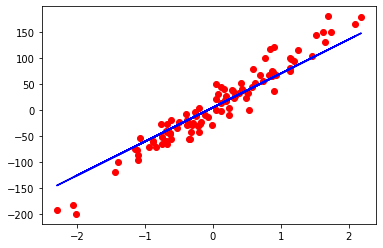

In [10]:
# training loop

num_epochs = 100
for epoch in range(num_epochs):

  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted,y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 ==0:
    print(f'epoch:{epoch+1},loss={loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()




